# Exploration

In [26]:
library(tidyverse)
library(repr)
library(infer)
library(ggplot2) 
library(gridExtra)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [39]:
cardio_data <- read.csv("data/cardio_train.csv", sep = ';') %>%
    mutate(age = age / 365)

head(cardio_data)

cat("Any rows with NA ? ", nrow(cardio_data) != nrow(na.omit(cardio_data)))

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,50.39178,2,168,62,110,80,1,1,0,0,1,0
2,1,55.41918,1,156,85,140,90,3,1,0,0,1,1
3,2,51.66301,1,165,64,130,70,3,1,0,0,0,1
4,3,48.28219,2,169,82,150,100,1,1,0,0,1,1
5,4,47.87397,1,156,56,100,60,1,1,0,0,0,0
6,8,60.03836,1,151,67,120,80,2,2,0,0,0,0


Any rows with NA ?  FALSE

In [161]:
y_cardio <- cardio_data %>%
    filter(cardio == 1)

n_cardio <- cardio_data %>%
    filter(cardio == 0)

male_cardio <- cardio_data %>%
    filter(gender == 2) 

male_prop <- male_cardio %>%
    group_by(cardio) %>%
    summarise(prop = n() / nrow(male_cardio))
    
female_cardio <- cardio_data %>%
    filter(gender == 1) 
   
female_prop <- female_cardio %>%
    group_by(cardio) %>%
    summarise(prop = n() / nrow(female_cardio))

male_pos_cardio <- cardio_data %>%
    filter(gender == 2 & cardio == 1) 

female_pos_cardio <- cardio_data %>%
    filter(gender == 2 & cardio == 1) 

alc_con_cardio <- cardio_data %>%
    filter(alco == 1) 

alc_con_pos_cardio <- cardio_data %>%
    filter(alco == 1 & cardio == 1) 


alc_non_cardio <- cardio_data %>%
    filter(alco == 0) 

alc_non_pos_cardio <- cardio_data %>%
    filter(alco == 0 & cardio == 1) 

# dataset is balanced
cat("Class Ratio : ", nrow(y_cardio) / nrow(n_cardio))

# balanced for each gender as well
male_pos_prop
female_pos_prop

gender_ratio <- nrow(male_cardio) / nrow(female_cardio)
gender_pos_ratio <- nrow(male_pos_cardio) / nrow(female_pos_cardio)

# almost twice as many female observations in dataset, but an equal number of positive observations for both genders
# -> men are twice as likely to have cardio disease ? 
cat("General Gender Ratio : ", gender_ratio, "Gender Positive Ratio : ", gender_pos_ratio, "\n")
cat("Alcohol Consumer Positive Rate : ", nrow(alc_con_pos_cardio) / nrow(alc_con_cardio), "\n")
cat("Non-Alcohol Consumer Positive Rate : ", nrow(alc_non_pos_cardio) / nrow(alc_non_cardio))

head(n_cardio)

Class Ratio :  0.9988007

cardio,prop
<int>,<dbl>
0,0.4947691
1,0.5052309


cardio,prop
<int>,<dbl>
0,0.5032726
1,0.4967274


General Gender Ratio :  0.5374478 Gender Positive Ratio :  1 
Alcohol Consumer Positive Rate :  0.4843252 
Non-Alcohol Consumer Positive Rate :  0.5005737

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
,<int>,<dbl>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,50.39178,2,168,62,110,80,1,1,0,0,1,0
2,4,47.87397,1,156,56,100,60,1,1,0,0,0,0
3,8,60.03836,1,151,67,120,80,2,2,0,0,0,0
4,9,60.58356,1,157,93,130,80,3,1,0,0,1,0
5,13,48.40548,1,158,71,110,70,1,1,0,0,1,0
6,14,54.33973,1,164,68,110,60,1,1,0,0,0,0


## Looking for useful features

In [139]:
age_cardio <- cardio_data %>%
    select(age)

weight_cardio <- cardio_data %>%
    select(weight)

ap_hi_cardio <- cardio_data %>%
    select(ap_lo)

ap_lo_cardio <- cardio_data %>%
    select(ap_lo)

chol_cardio <- cardio_data %>%
    select(cholesterol)

gluc_cardio <- cardio_data %>%
    select(gluc)

all_dfs <- list(age_cardio, weight_cardio, ap_hi_cardio, ap_lo_cardio, chol_cardio, gluc_cardio)

In [141]:
generate_distributions <- function(df_n, df_y) {
    # print(head(df_n))
    n_samples <- df_n %>%
        specify(response = var) %>%
        generate(type = 'bootstrap', reps = 1000, size = 100) %>%
        calculate(stat = "mean") 


    y_samples <- df_y %>%
        specify(response = var) %>%
        generate(type = 'bootstrap', reps = 1000, size = 100) %>%
        calculate(stat = "mean") 

    return(list(n_samples, y_samples))
}


generate_bootstrap_plots <- function(df_n, df_y, mean_n, mean_y, feature) {
    dist_n <- df_n %>%
    ggplot() + 
    geom_histogram(aes(x=stat), bins = 60) +
    geom_vline(xintercept = mean_n, colour = "red") +
    labs(title = paste(feature, " n_mean : ", n_age_mean), x = "Mean", y = "Count") 

    dist_y <- df_y %>%
    ggplot() + 
    geom_histogram(aes(x=stat), bins = 60) +
    geom_vline(xintercept = mean_y, colour = "red") +
    labs(title = paste(feature, " y_mean : ", y_age_mean), x = "Mean", y = "Count") 

    grid.arrange(dist_n, dist_y, ncol = 2)
}



## Generate Distributions

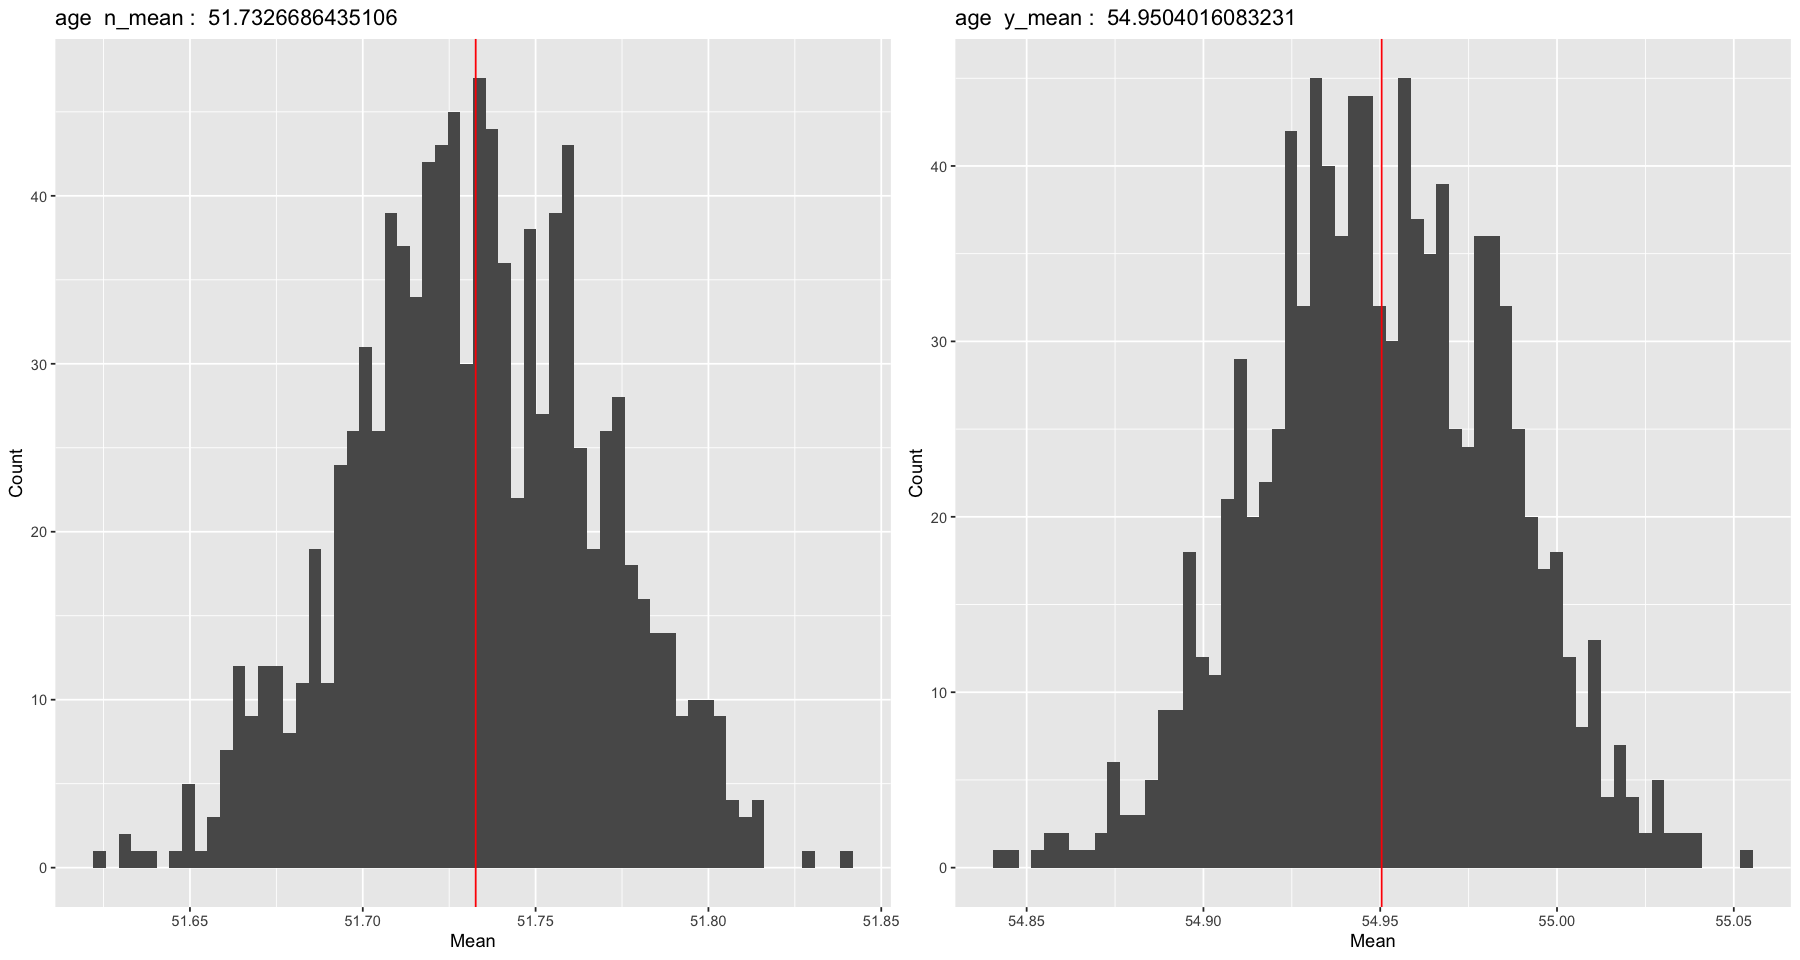

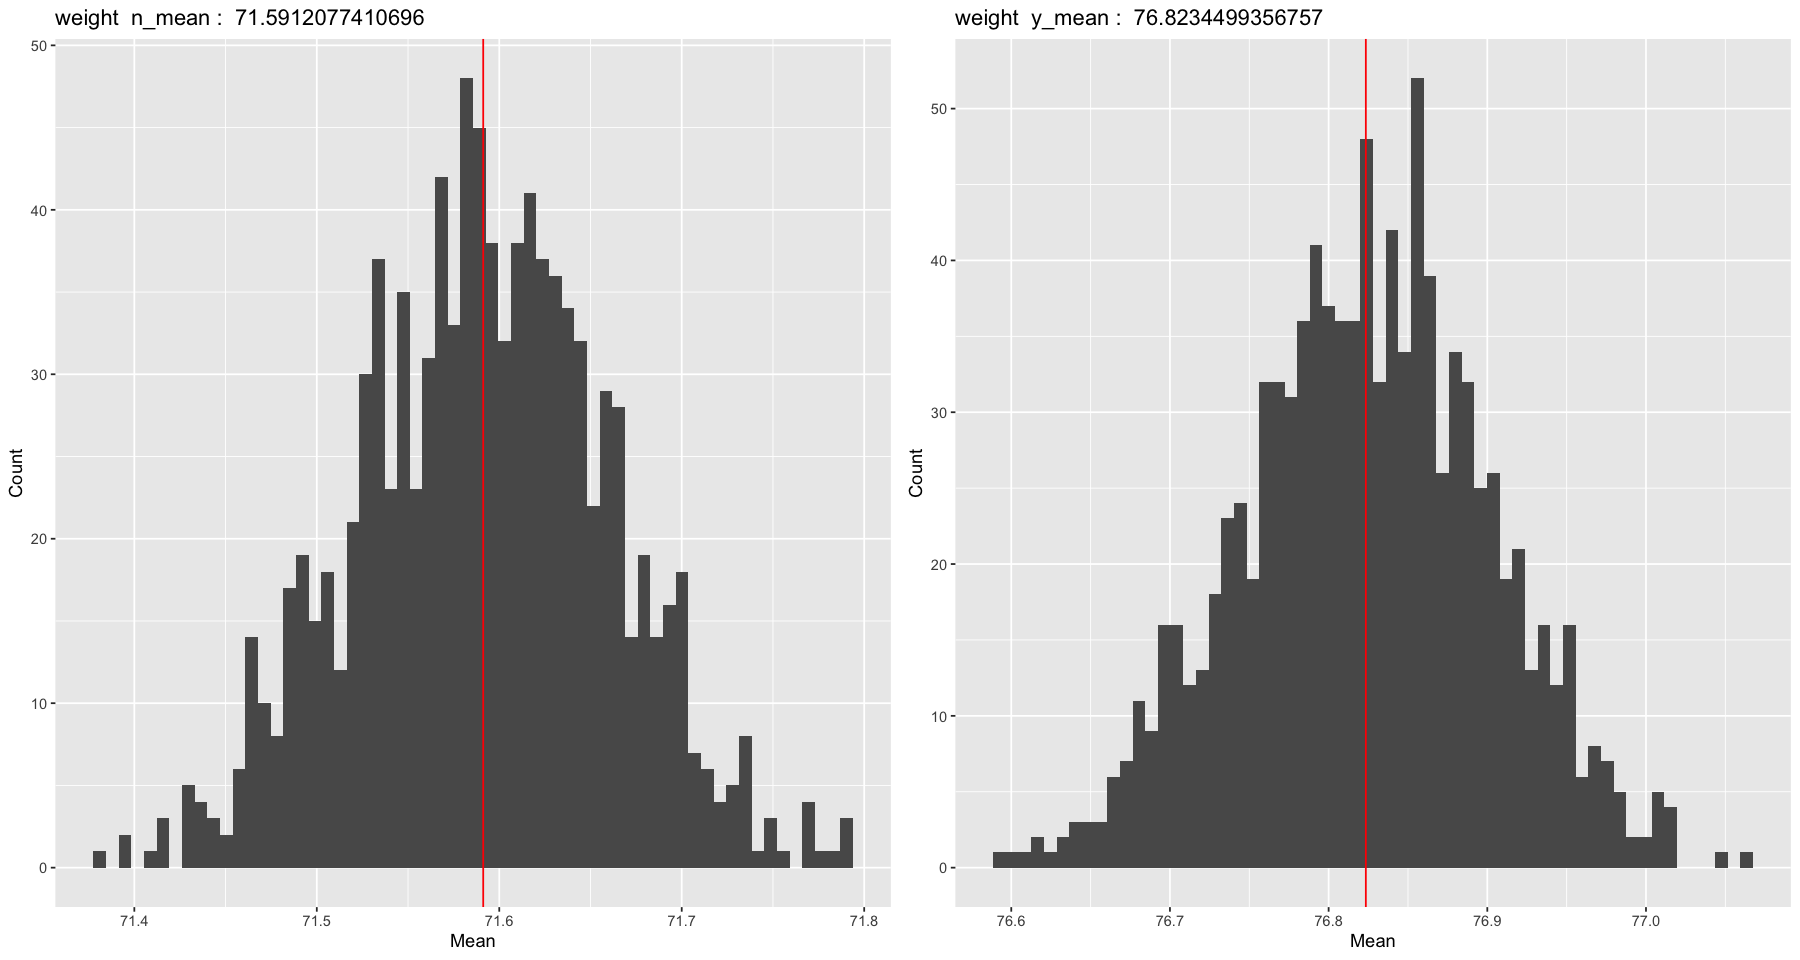

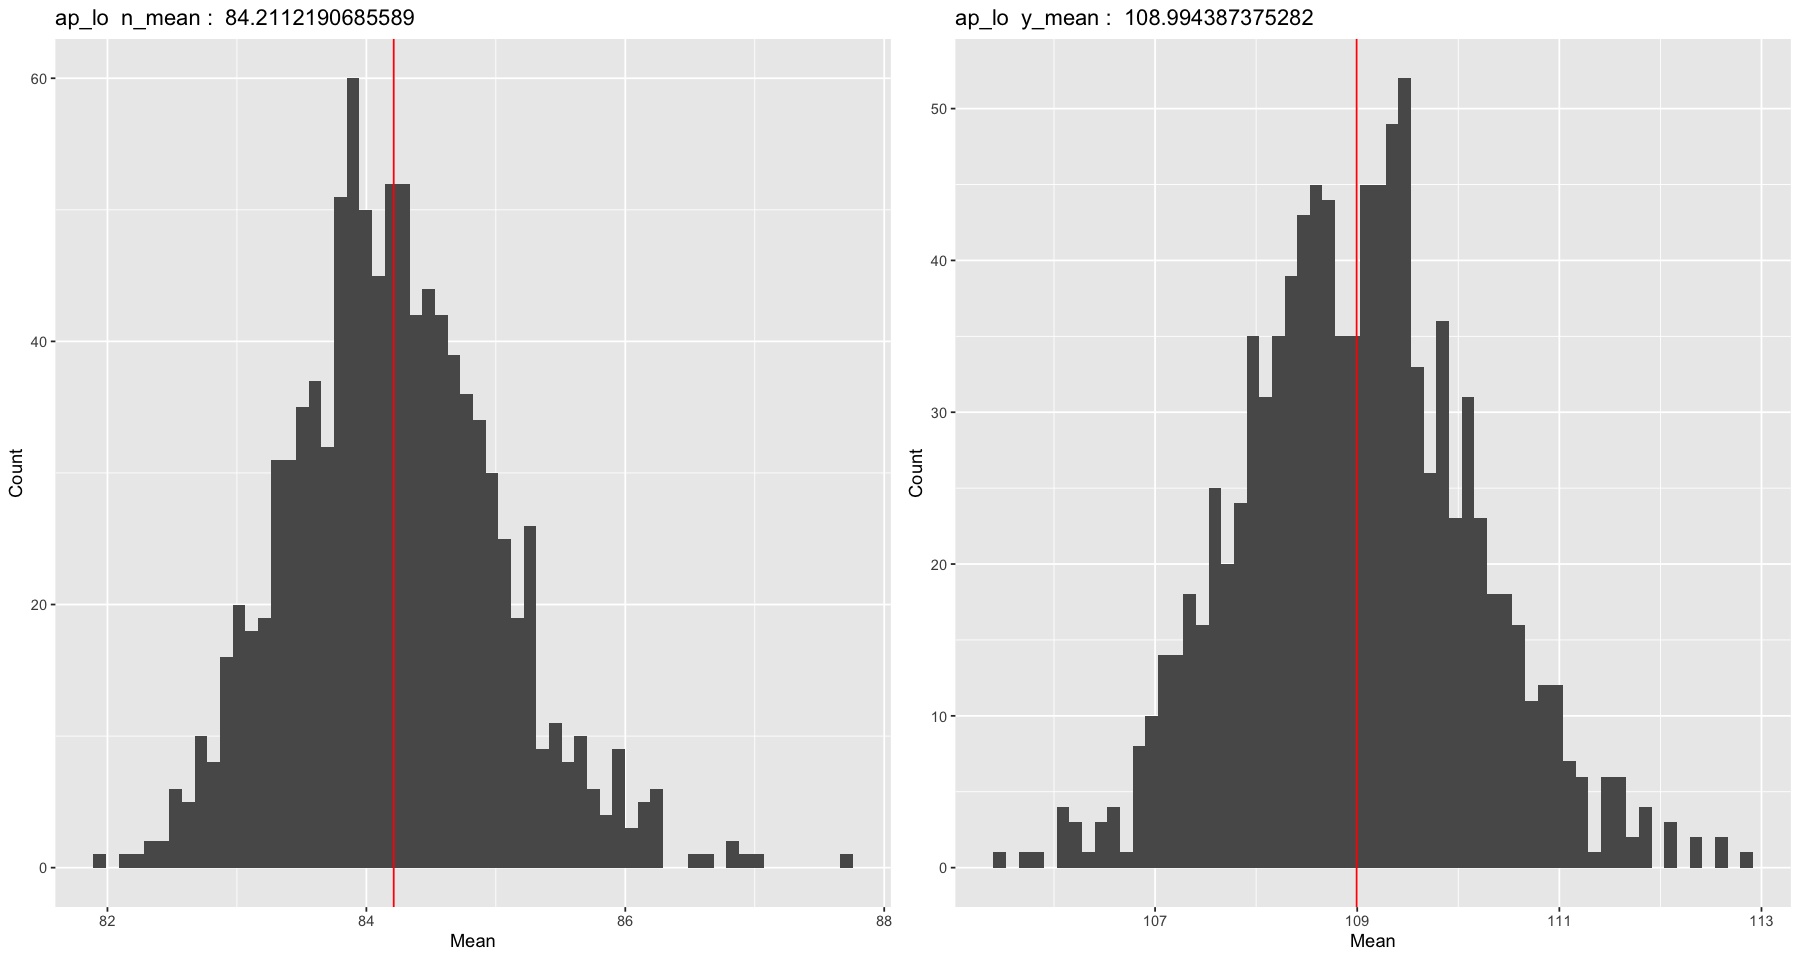

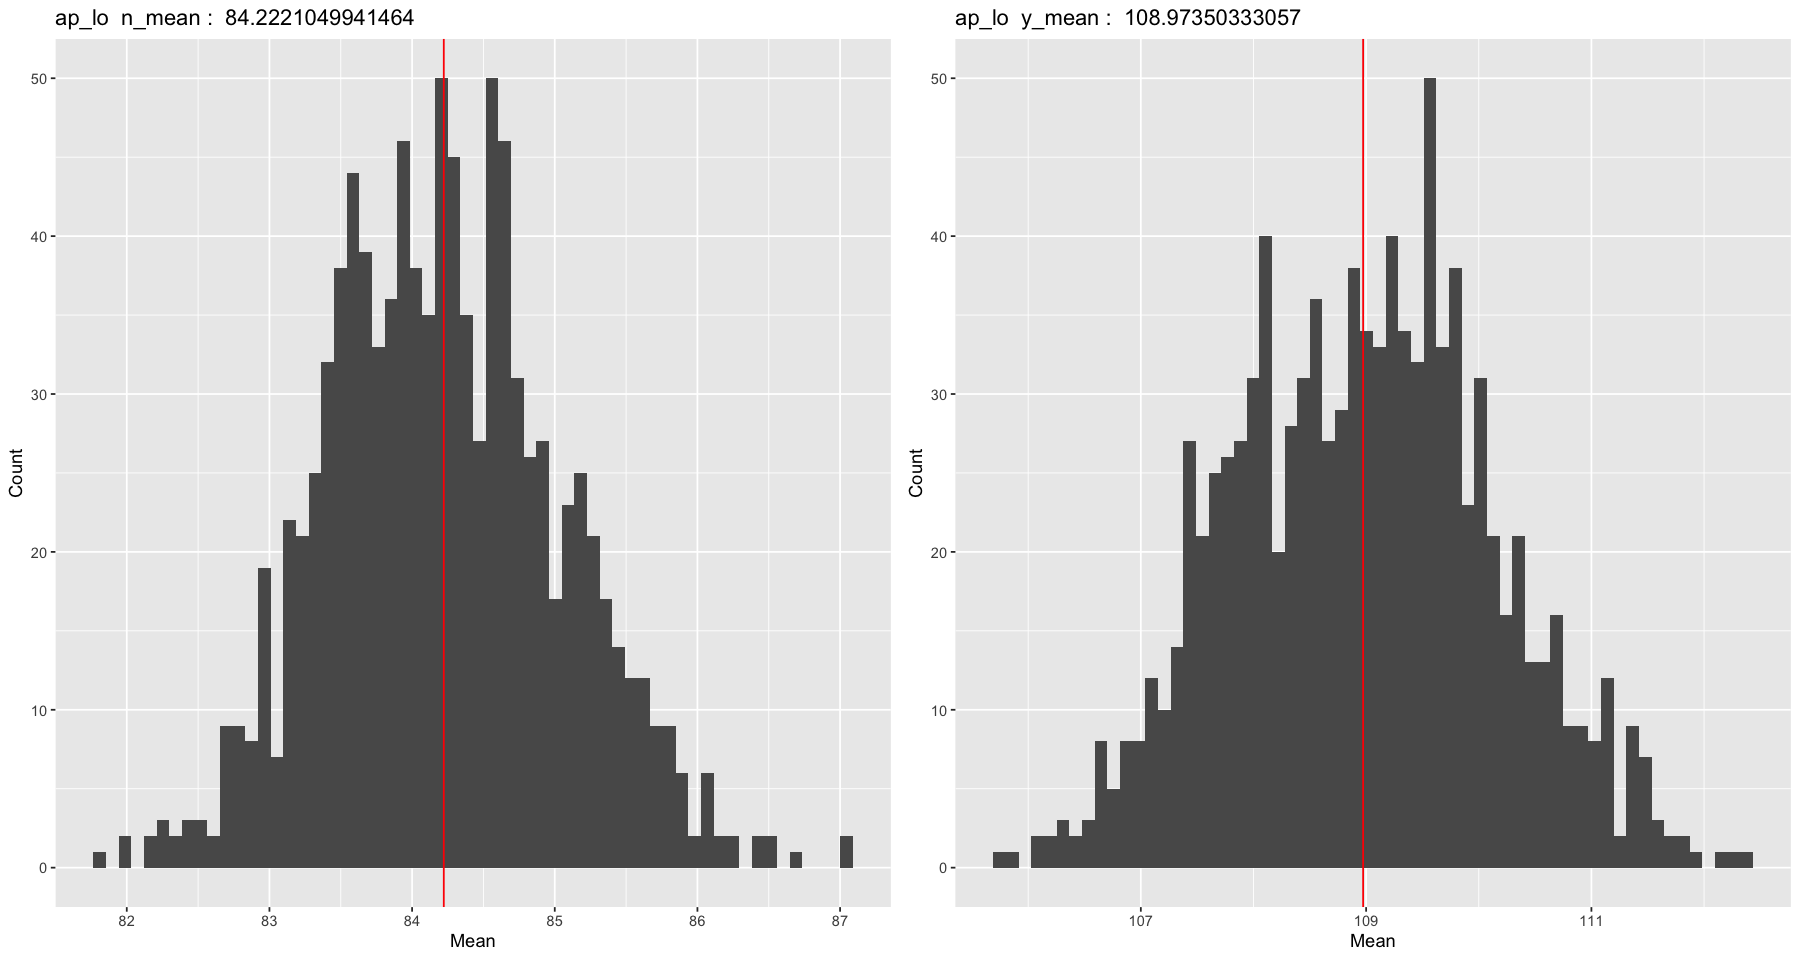

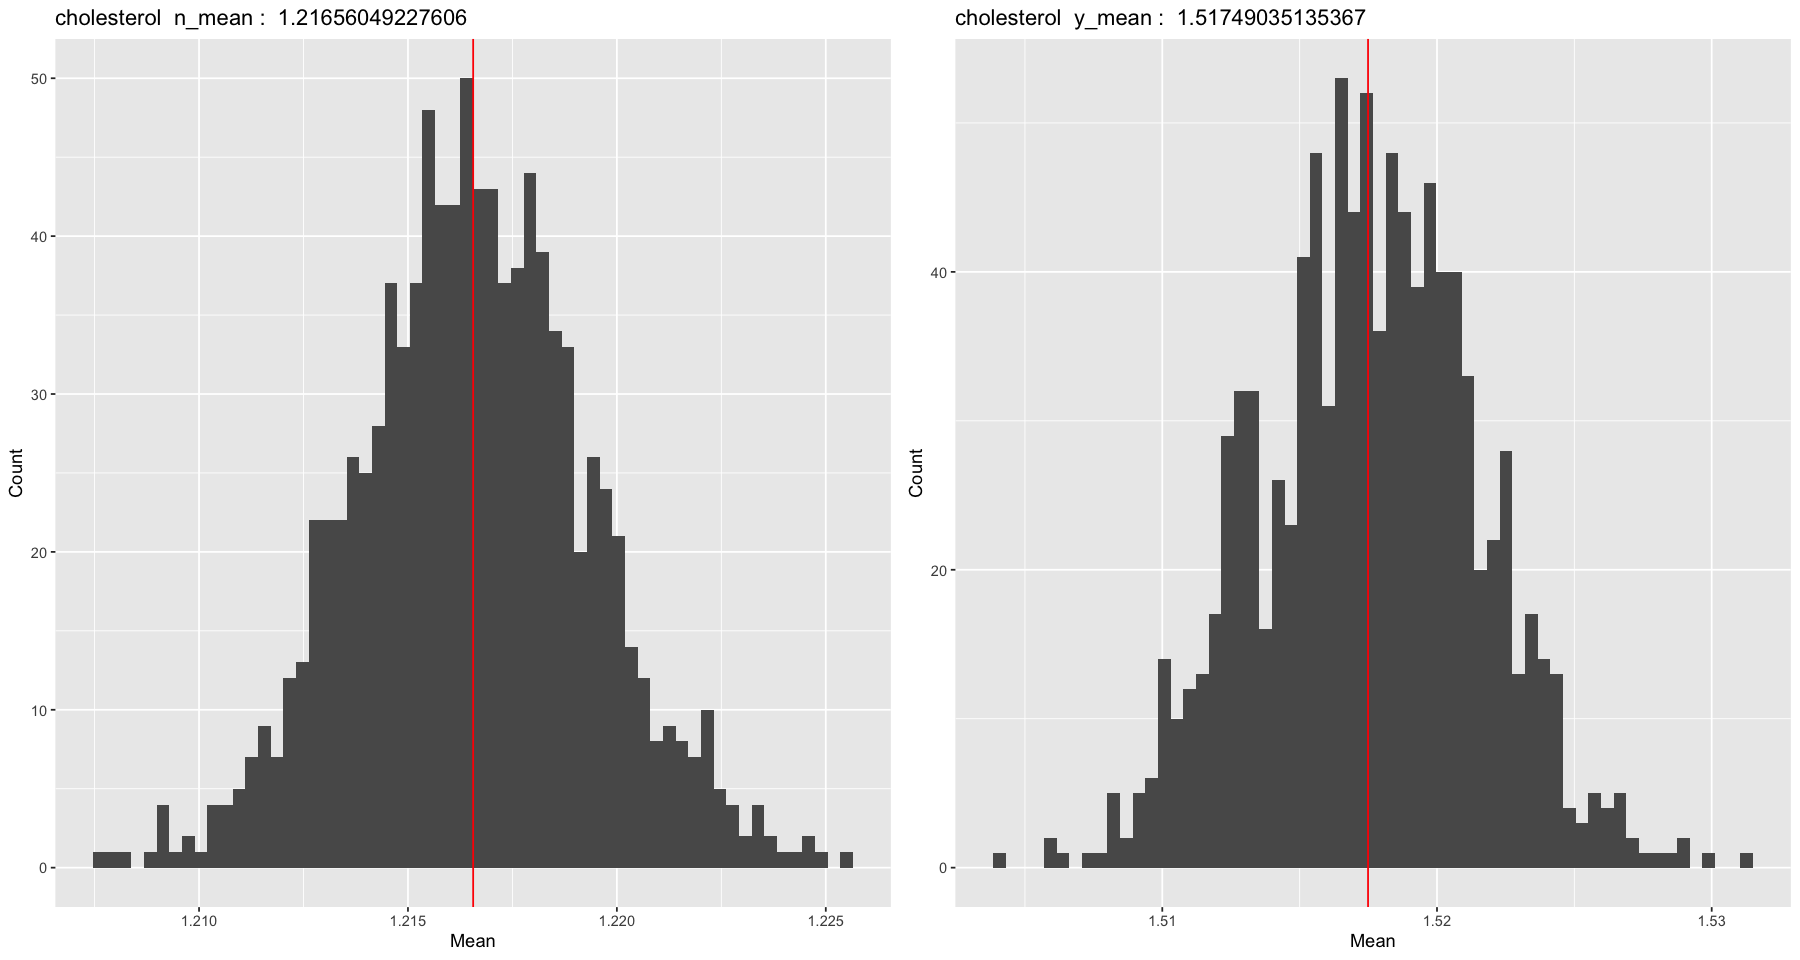

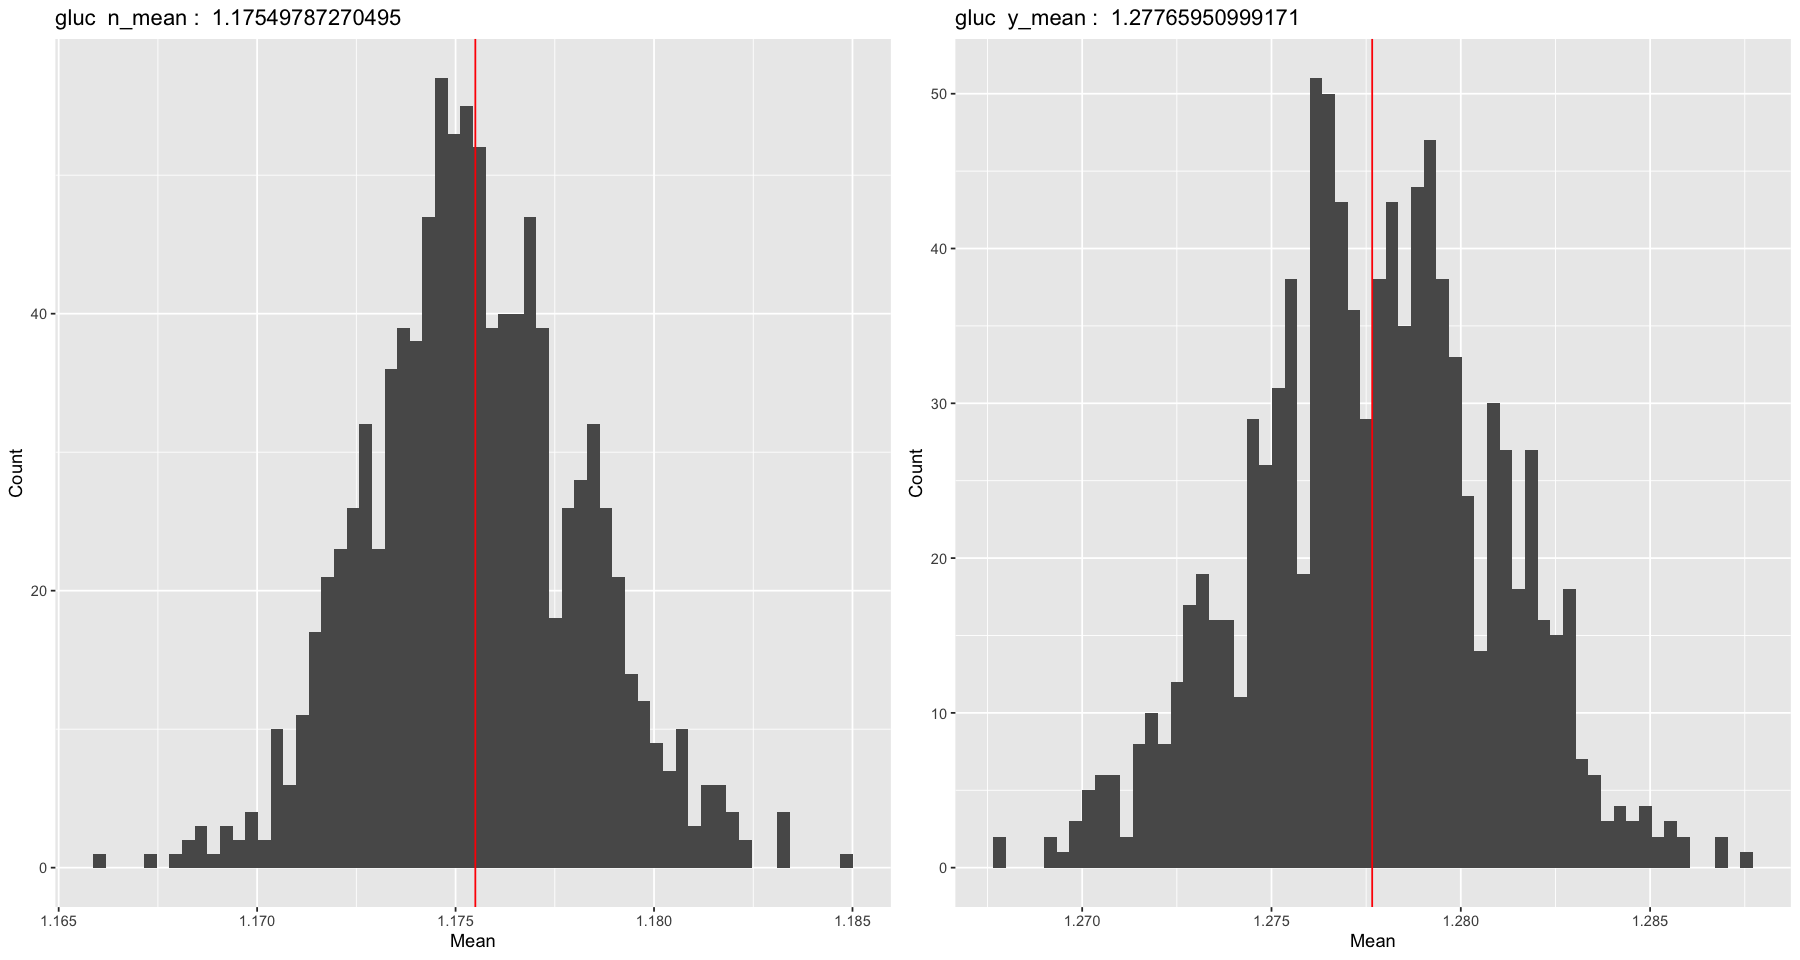

In [142]:
options(repr.plot.width=15, repr.plot.height=8)

for (df in all_dfs) {
    full_df <- data.frame(df, cardio = cardio_data$cardio)
    feature <- colnames(df)[1]
    colnames(full_df)[1] = "var"
    
    # print(head(full_df))
    # print(feature)
    
    y_data <- full_df %>%
        filter(cardio == 1)

    n_data <- full_df %>%
        filter(cardio == 0)

    distributions <- generate_distributions(n_data, y_data)

    n_samples <- distributions[[1]]
    y_samples <- distributions[[2]]
    
    n_age_mean <- mean(n_samples$stat)
    y_age_mean <- mean(y_samples$stat)

    # print(head(n_samples))
    generate_bootstrap_plots(n_samples, y_samples, n_age_mean, y_age_mean, feature)
    
    
}